# Data Mining Project - Load default prediction
### Prepared by:
- Anas Alrantisi 20218068
- Mohammad Awwad 20218131
- Ibrahim Abedalghafer 20218084

#### Data file name projdata.csv


#### Loading the needed libraries
##### NOTE: a restart for the runtime is needed after the installtion of dython to laod the needed matplot libraries again

In [3]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import dython
    from sklearn.preprocessing import OneHotEncoder
except:
    %pip install pandas
    %pip install numpy
    %pip install xgboost
    %pip install matplotlib
    %pip install seaborn
    %pip install imblearn
    %pip install collection
    %pip install dython
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import dython
    from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv('./projdata.csv')
df.shape

(81691, 56)

In [5]:
df.head()

,Customer Branch,Customer ID,Gender,Date of Birth,Age,Age Band,Nationality,Marital Status,Employment Status,Employer Category,...,Salary Band,Has Delinquent Loans,No. of Days Delinquent,Delinquency Bucket,Delinquency Reason,Application Score,Finance to Value,Down Payment,Salesman,Loan Status
0,Branch 1390,90141886.0,MALE,10/02/1947 00:00:00,70.0,age 65+,Jordan,MARRIED,RETIRED,Retirees,...,500 - 1 K,YES,10,1 - 30 DPD,NaN,NaN,0.0,0.0,788,CLOSED
1,Branch 1010,90109151.0,FEMALE,10/01/1974 00:00:00,43.0,age 40 - 50,Jordan,MARRIED,FULL TIME EMPLOYED,Private Sector,...,< 250,NO,0,Normal,NaN,NaN,0.0,0.0,788,ACTIVE
2,Branch 1010,90335567.0,FEMALE,25/02/1974 00:00:00,43.0,age 40 - 50,Jordan,MARRIED,FULL TIME EMPLOYED,Private Sector,...,< 250,NO,0,Normal,NaN,NaN,0.0,0.0,788,ACTIVE
3,Branch 1010,90856788.0,MALE,14/06/2010 00:00:00,7.0,age < 18,Jordan,SINGLE,NaN,Private Sector,...,< 250,NO,0,Normal,NaN,NaN,0.0,0.0,788,ACTIVE
4,Branch 1010,90171145.0,MALE,25/06/1969 00:00:00,48.0,age 40 - 50,Jordan,MARRIED,FULL TIME EMPLOYED,Private Sector,...,< 250,NO,0,Normal,NaN,NaN,0.0,0.0,350127,ACTIVE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81691 entries, 0 to 81690
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer Branch           81689 non-null  object 
 1   Customer ID               81689 non-null  float64
 2   Gender                    81689 non-null  object 
 3   Date of Birth             81689 non-null  object 
 4   Age                       81689 non-null  float64
 5   Age Band                  81689 non-null  object 
 6   Nationality               81689 non-null  object 
 7   Marital Status            81608 non-null  object 
 8   Employment Status         73963 non-null  object 
 9   Employer Category         81559 non-null  object 
 10  Occupation                81361 non-null  object 
 11  Salary Transfer           81689 non-null  object 
 12  Income                    81689 non-null  float64
 13  Income Band               81689 non-null  object 
 14  Busine

##### Selecting only active loans to be used for the prediction

In [7]:
df = df[df['Loan Status'] == 'ACTIVE'] 
df.shape

(81683, 56)

##### Adding the feature '**Label**' as our class label, and based on the bussiness needs that person is defaulted from the loan if it has a number of delinquent days more than 90 day

In [8]:
df.rename(columns= {'No. of Days Delinquent': 'NoDaysDelinquent'}, inplace=True)
df['Label'] = np.where(df['NoDaysDelinquent'] >= 90, 1, 0)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


##### The below features were dropped base on the bussiness understanding

In [9]:
df = df.drop(['Customer ID', 'Customer Branch', 'Age','Income','Serial Number',
                                'Occupation','Segment','Sector','Outstanding Balance EQVL',
              'Product','Currency','Booking Date', 'Join date', 'Sales Branch', 
              'Maturity Date','Approved Interest Rate ','Interest Rate','Tenor Band',
             'Payment Type','Approved Salary ','Has Delinquent Loans', 'NoDaysDelinquent',
             'Delinquency Reason','Application Score','Finance to Value','Down Payment','Salesman','Loan Status',
                               'Date of Birth'], axis = 1)

##### Doing columns rename to remove the spaces in the names

In [10]:
df.rename(columns= {
                        'Gender': 'Gender',
                        'Age Band': 'AgeBand', 
                        'Nationality': 'Nationality',
                        'Marital Status': 'MaritalStatus',
                        'Employment Status': 'EmploymentStatus',
                        'Employer Category': 'EmployerCategory',
                        'Salary Transfer': 'SalaryTransfer',
                        'Income Band': 'IncomeBand',
                        'Total Customer Deposits': 'TotalCustomerDeposits',
                        'Business Line': 'BusinessLine',
                        'Industry': 'Industry',
                        'Relationship Type': 'RelationshipType',
                        'Length of Relationship': 'LengthOfRelationship',
                        'KYC Risk Level': 'KYCRiskLevel',
                        'Customer Status': 'CustomerStatus',
                        'Total Customer Deposit':'TotalCustomerDeposit',
                        'Main Product' : 'MainProduct',
                        'Approved Amount EQVL' : 'ApprovedAmountEQVL',
                        'Outstanding Balance' : 'OutstandingBalance',
                        'Interest Rate Band': 'InterestRateBand',
                        'Interest Rate Type' :'InterestRateType',
                        'Tenor in Months' : 'TenorInMonths',
                        'Remaining Tenor' : 'RemainingTenor',
                        'DBR Band' : 'DBRBand',
                        'Monthly Payment': 'MonthlyPayment',
                        'Payment Frequency': 'PaymentFrequency',
                        'Salary Band': 'SalaryBand',
                        'Delinquency Bucket': 'DelinquencyBucket'
                        
                    }, inplace = True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81683 entries, 1 to 81690
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 81681 non-null  object 
 1   AgeBand                81681 non-null  object 
 2   Nationality            81681 non-null  object 
 3   MaritalStatus          81600 non-null  object 
 4   EmploymentStatus       73956 non-null  object 
 5   EmployerCategory       81551 non-null  object 
 6   SalaryTransfer         81681 non-null  object 
 7   IncomeBand             81681 non-null  object 
 8   BusinessLine           81680 non-null  object 
 9   Industry               81681 non-null  object 
 10  RelationshipType       81681 non-null  object 
 11  LengthOfRelationship   81681 non-null  object 
 12  KYCRiskLevel           81681 non-null  object 
 13  CustomerStatus         81681 non-null  object 
 14  TotalCustomerDeposits  79376 non-null  float64
 15  Ma

##### Starting with Data preprocessing, the rows that had very low number of of null records where dropped

In [12]:
df.drop(df[df['MaritalStatus'].isnull()].index, inplace = True)

df.shape

(81600, 28)

In [13]:
df.drop(df[df['BusinessLine'].isnull()].index, inplace = True)

df.shape
 

(81599, 28)

In [14]:
df.drop(df[df['Industry'].isnull()].index, inplace = True)

df.shape

(81599, 28)

In [15]:
df.drop(df[df['KYCRiskLevel'] == 0].index, inplace = True)

# Print the shape of the dataframe
df.shape

(81599, 28)

In [16]:
df.drop(df[df['InterestRateType'] == '-2'].index, inplace = True)

# Print the shape of the dataframe
df.shape

(81598, 28)

In [17]:
df.drop(df[df['Gender'].isnull()].index, inplace = True)
df.shape

(81598, 28)

##### Renaming the record from عسكري to Militry in the EmployerCategory and fill the missing values as a new category called others, as it is expected that the bank will get this data not filled

In [18]:
df.loc[df.EmployerCategory.isna(), "EmployerCategory"] = "Others"
df.loc[df.EmployerCategory.str.contains("عسكري", case =False), "EmployerCategory"] = "Military"

##### For other categorical variables filling them with the mode value and one numerical value with mean

In [19]:
df['PaymentFrequency'].fillna('M', inplace=True)
df['EmploymentStatus'].fillna('FULL TIME EMPLOYED', inplace=True)
df['TotalCustomerDeposits'].fillna(value=df['TotalCustomerDeposits'].mean(), inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 81598 entries, 1 to 81690
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 81598 non-null  object 
 1   AgeBand                81598 non-null  object 
 2   Nationality            81598 non-null  object 
 3   MaritalStatus          81598 non-null  object 
 4   EmploymentStatus       81598 non-null  object 
 5   EmployerCategory       81598 non-null  object 
 6   SalaryTransfer         81598 non-null  object 
 7   IncomeBand             81598 non-null  object 
 8   BusinessLine           81598 non-null  object 
 9   Industry               81598 non-null  object 
 10  RelationshipType       81598 non-null  object 
 11  LengthOfRelationship   81598 non-null  object 
 12  KYCRiskLevel           81598 non-null  object 
 13  CustomerStatus         81598 non-null  object 
 14  TotalCustomerDeposits  81598 non-null  float64
 15  Ma

In [20]:
df.head()

,Gender,AgeBand,Nationality,MaritalStatus,EmploymentStatus,EmployerCategory,SalaryTransfer,IncomeBand,BusinessLine,Industry,...,InterestRateBand,InterestRateType,TenorInMonths,RemainingTenor,DBRBand,MonthlyPayment,PaymentFrequency,SalaryBand,DelinquencyBucket,Label
1,FEMALE,age 40 - 50,Jordan,MARRIED,FULL TIME EMPLOYED,Private Sector,No,< 250,Retail,Finance Insurance,...,3 - 5 %,FLOAT,74,37,< 10 %,470.0,M,< 250,Normal,0
2,FEMALE,age 40 - 50,Jordan,MARRIED,FULL TIME EMPLOYED,Private Sector,No,< 250,Retail,Finance Insurance,...,3 - 5 %,FLOAT,265,228,< 10 %,705.0,M,< 250,Normal,0
3,MALE,age < 18,Jordan,SINGLE,FULL TIME EMPLOYED,Private Sector,No,< 250,Retail,Finance Insurance,...,3 - 5 %,FLOAT,227,190,< 10 %,275.0,M,< 250,Normal,0
4,MALE,age 40 - 50,Jordan,MARRIED,FULL TIME EMPLOYED,Private Sector,No,< 250,Retail,Finance Insurance,...,3 - 5 %,FLOAT,146,109,< 10 %,540.0,M,< 250,Normal,0
5,MALE,age 30 - 40,Jordan,MARRIED,FULL TIME EMPLOYED,Private Sector,No,< 250,Retail,Finance Insurance,...,3 - 5 %,FLOAT,228,191,< 10 %,560.0,M,< 250,Normal,0


##### Doing manual label encoding for the binary features so that they are not sent to the one hot encoder command, in addition the 'CustomerStatus','RelationshipType' are also dropped as they have very low variation of the categories as shown below

##### dropping also monthlypayment as they are only recorded for last month payment only not historical

In [21]:
df.groupby('RelationshipType').count()

,Gender,AgeBand,Nationality,MaritalStatus,EmploymentStatus,EmployerCategory,SalaryTransfer,IncomeBand,BusinessLine,Industry,...,InterestRateBand,InterestRateType,TenorInMonths,RemainingTenor,DBRBand,MonthlyPayment,PaymentFrequency,SalaryBand,DelinquencyBucket,Label
RelationshipType,,,,,,,,,,,,,,,,,,,,,
Borrower,81585,81585,81585,81585,81585,81585,81585,81585,81585,81585,...,81585,81585,81585,81585,81585,81585,81585,81585,81585,81585
Depositor,13,13,13,13,13,13,13,13,13,13,...,13,13,13,13,13,13,13,13,13,13


In [22]:
df.groupby('CustomerStatus').count()

,Gender,AgeBand,Nationality,MaritalStatus,EmploymentStatus,EmployerCategory,SalaryTransfer,IncomeBand,BusinessLine,Industry,...,InterestRateBand,InterestRateType,TenorInMonths,RemainingTenor,DBRBand,MonthlyPayment,PaymentFrequency,SalaryBand,DelinquencyBucket,Label
CustomerStatus,,,,,,,,,,,,,,,,,,,,,
Active,81596,81596,81596,81596,81596,81596,81596,81596,81596,81596,...,81596,81596,81596,81596,81596,81596,81596,81596,81596,81596
Dormant,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [23]:
df = df.drop(['MonthlyPayment', 'CustomerStatus', 'RelationshipType'], axis=1)

gender_index={'FEMALE':0, 'MALE':1}
df['Gender'] = df['Gender'].map(gender_index)

salary_transfer_index = {'No':0,'Yes':1}
df['SalaryTransfer'] = df['SalaryTransfer'].map(salary_transfer_index)

bline_index = {'Corporate':0, 'Retail':1}
df['BusinessLine'] = df['BusinessLine'].map(bline_index)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81598 entries, 1 to 81690
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 81598 non-null  int64  
 1   AgeBand                81598 non-null  object 
 2   Nationality            81598 non-null  object 
 3   MaritalStatus          81598 non-null  object 
 4   EmploymentStatus       81598 non-null  object 
 5   EmployerCategory       81598 non-null  object 
 6   SalaryTransfer         81598 non-null  int64  
 7   IncomeBand             81598 non-null  object 
 8   BusinessLine           81598 non-null  int64  
 9   Industry               81598 non-null  object 
 10  LengthOfRelationship   81598 non-null  object 
 11  KYCRiskLevel           81598 non-null  object 
 12  TotalCustomerDeposits  81598 non-null  float64
 13  MainProduct            81598 non-null  object 
 14  ApprovedAmountEQVL     81598 non-null  float64
 15  Ou

##### building the correlation matrix to see if there is any correlation between the features selected so far and the label or a correlation between the features themselves

In [25]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
categorical_features=identify_nominal_columns(df)
categorical_features

['AgeBand',
 'Nationality',
 'MaritalStatus',
 'EmploymentStatus',
 'EmployerCategory',
 'IncomeBand',
 'Industry',
 'LengthOfRelationship',
 'KYCRiskLevel',
 'MainProduct',
 'InterestRateBand',
 'InterestRateType',
 'DBRBand',
 'PaymentFrequency',
 'SalaryBand',
 'DelinquencyBucket']

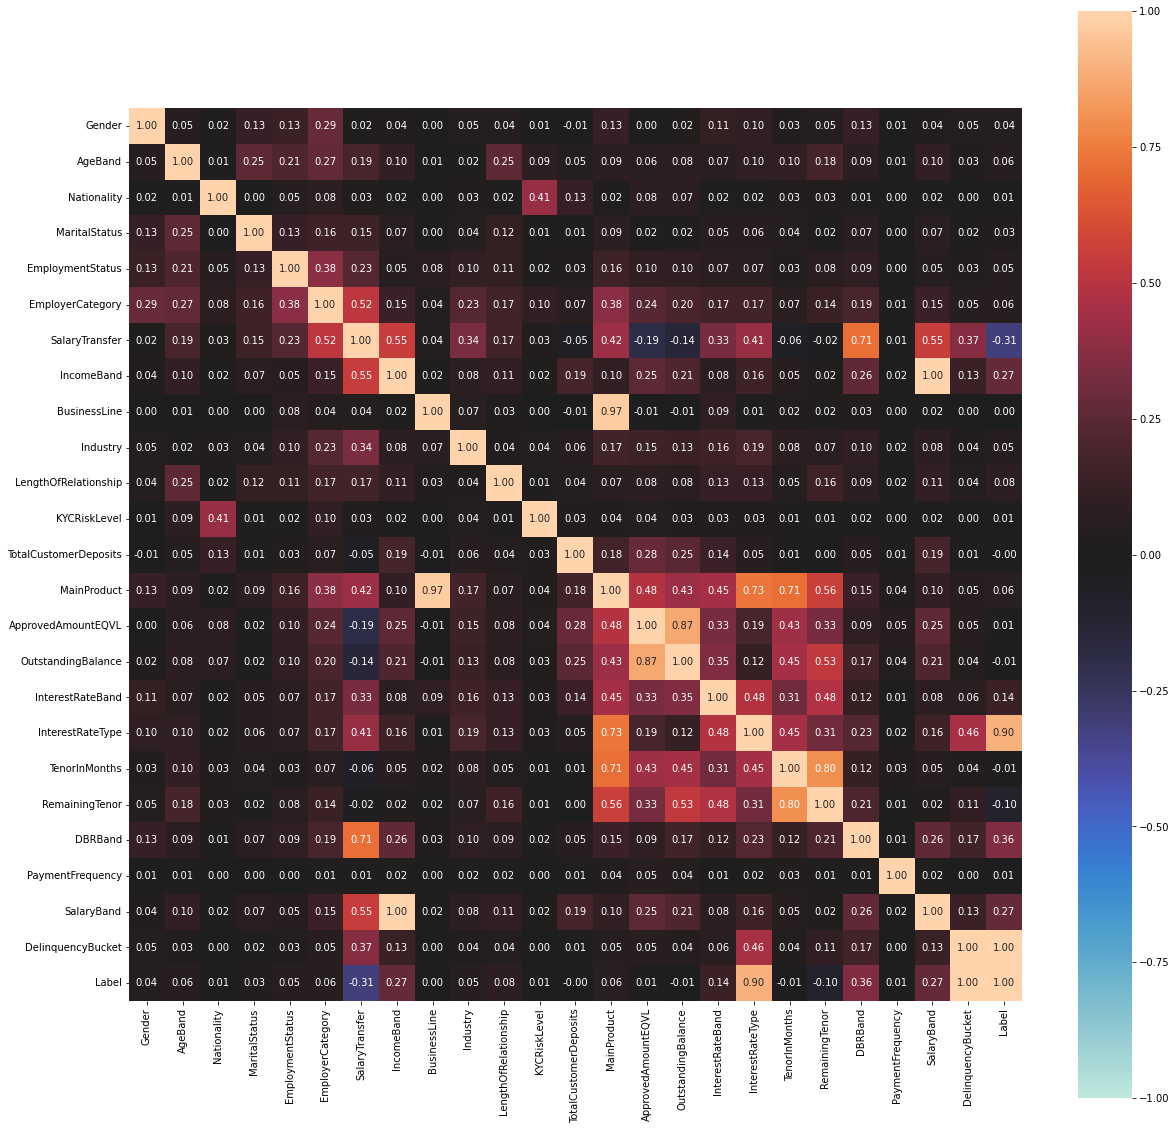

In [26]:
complete_correlation= associations(df, filename= 'complete_correlation.png', figsize=(20,20))

##### Droping features with high correlation (>0.8) based on correlation matrix

In [27]:
df.drop(['SalaryBand','BusinessLine', 'OutstandingBalance','InterestRateType','RemainingTenor','DelinquencyBucket'], axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81598 entries, 1 to 81690
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 81598 non-null  int64  
 1   AgeBand                81598 non-null  object 
 2   Nationality            81598 non-null  object 
 3   MaritalStatus          81598 non-null  object 
 4   EmploymentStatus       81598 non-null  object 
 5   EmployerCategory       81598 non-null  object 
 6   SalaryTransfer         81598 non-null  int64  
 7   IncomeBand             81598 non-null  object 
 8   Industry               81598 non-null  object 
 9   LengthOfRelationship   81598 non-null  object 
 10  KYCRiskLevel           81598 non-null  object 
 11  TotalCustomerDeposits  81598 non-null  float64
 12  MainProduct            81598 non-null  object 
 13  ApprovedAmountEQVL     81598 non-null  float64
 14  InterestRateBand       81598 non-null  object 
 15  Te

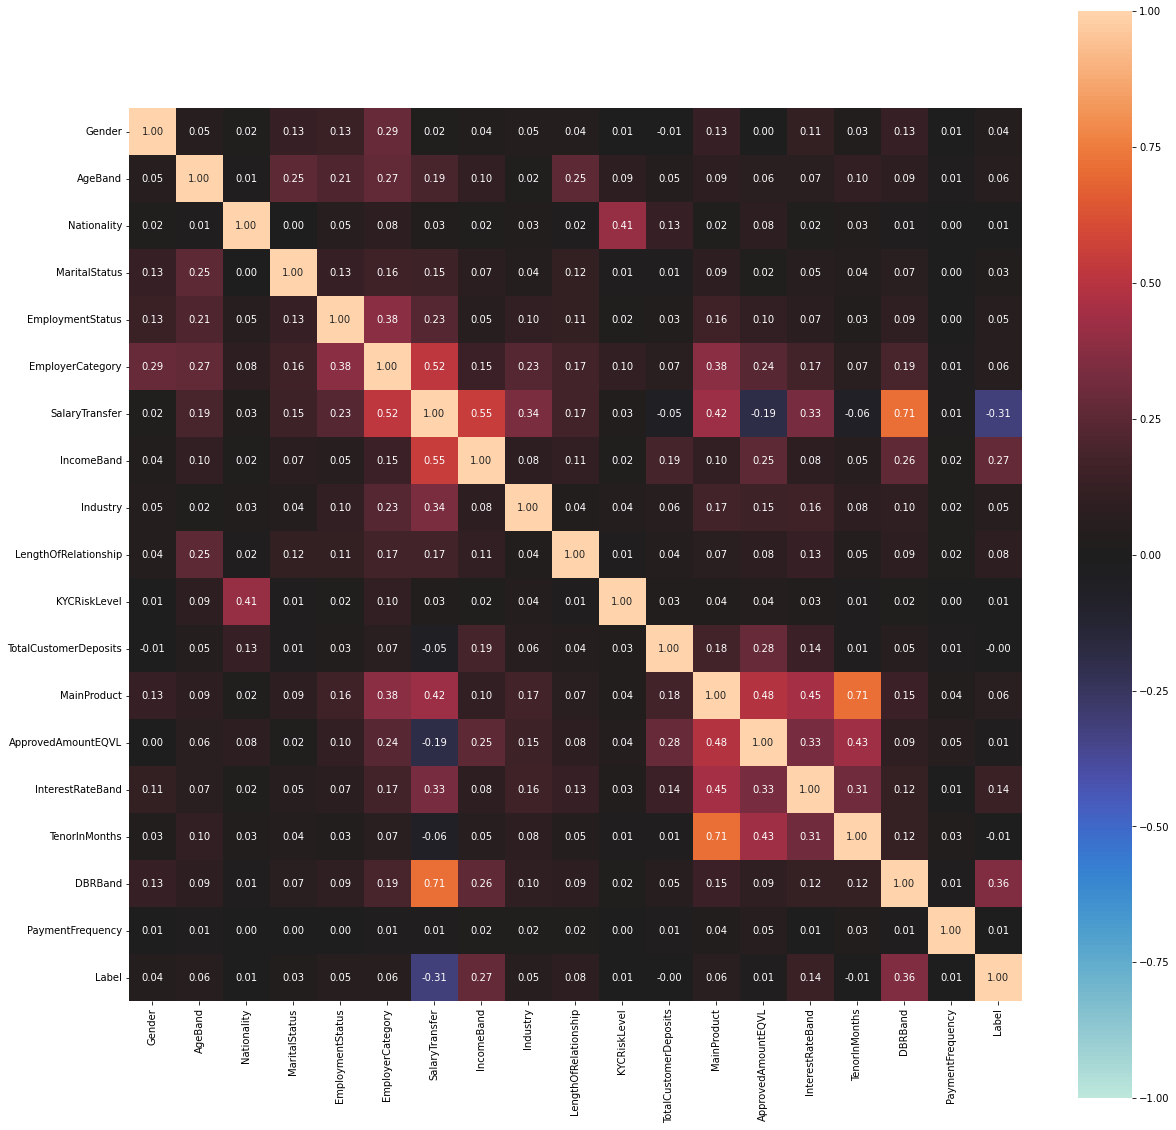

In [29]:
categorical_features=identify_nominal_columns(df)
categorical_features
complete_correlation= associations(df, filename= 'complete_correlation1.png', figsize=(20,20))

### Start with the encoding

In [30]:
from sklearn.preprocessing import OneHotEncoder as OHE
ohe=OHE(handle_unknown="ignore")
df_encode = df[categorical_features]
# Dropping those feature as they will be regoined after encoding
df = df.drop(categorical_features, axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81598 entries, 1 to 81690
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 81598 non-null  int64  
 1   SalaryTransfer         81598 non-null  int64  
 2   TotalCustomerDeposits  81598 non-null  float64
 3   ApprovedAmountEQVL     81598 non-null  float64
 4   TenorInMonths          81598 non-null  int64  
 5   Label                  81598 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 6.4 MB


In [32]:
df_done = pd.DataFrame(ohe.fit_transform(df_encode).toarray())
df_done.reset_index(drop=True, inplace=True)
df_done.columns = ohe.get_feature_names_out()
df.reset_index(drop=True, inplace=True)
df_final = df.join(df_done)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81598 entries, 0 to 81597
Columns: 112 entries, Gender to PaymentFrequency_Y
dtypes: float64(108), int64(4)
memory usage: 69.7 MB


In [33]:
df = df_final.copy()
df.head()

,Gender,SalaryTransfer,TotalCustomerDeposits,ApprovedAmountEQVL,TenorInMonths,Label,AgeBand_age 18 - 25,AgeBand_age 25 - 30,AgeBand_age 30 - 40,AgeBand_age 40 - 50,...,DBRBand_30 - 40 %,DBRBand_40 - 50 %,DBRBand_50 - 60 %,DBRBand_60 % +,DBRBand_< 10 %,PaymentFrequency_C,PaymentFrequency_F,PaymentFrequency_M,PaymentFrequency_W,PaymentFrequency_Y
0,0,0,0.999,14603.212,74,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,0.169,70762.795,265,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0.000,28595.833,227,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,5.401,34033.583,146,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0.000,54291.680,228,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Start with scaling for numerical attributes

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
num_feature = ['TotalCustomerDeposits','ApprovedAmountEQVL','TenorInMonths']
df_scale = pd.DataFrame(min_max_scaler.fit_transform(df[num_feature]), columns=num_feature)

df_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81598 entries, 0 to 81597
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TotalCustomerDeposits  81598 non-null  float64
 1   ApprovedAmountEQVL     81598 non-null  float64
 2   TenorInMonths          81598 non-null  float64
dtypes: float64(3)
memory usage: 1.9 MB


In [35]:
df[num_feature[0]] = df_scale[num_feature[0]].copy()
df[num_feature[1]] = df_scale[num_feature[1]].copy()
df[num_feature[2]] = df_scale[num_feature[2]].copy()

In [36]:
df.head()

,Gender,SalaryTransfer,TotalCustomerDeposits,ApprovedAmountEQVL,TenorInMonths,Label,AgeBand_age 18 - 25,AgeBand_age 25 - 30,AgeBand_age 30 - 40,AgeBand_age 40 - 50,...,DBRBand_30 - 40 %,DBRBand_40 - 50 %,DBRBand_50 - 60 %,DBRBand_60 % +,DBRBand_< 10 %,PaymentFrequency_C,PaymentFrequency_F,PaymentFrequency_M,PaymentFrequency_W,PaymentFrequency_Y
0,0,0,8.721830e-07,0.050921,0.195122,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1.475465e-07,0.117100,0.712737,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1,0,0.000000e+00,0.067410,0.609756,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,4.715376e-06,0.073818,0.390244,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0.000000e+00,0.097690,0.612466,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Doing balance for the training data using SMOTE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


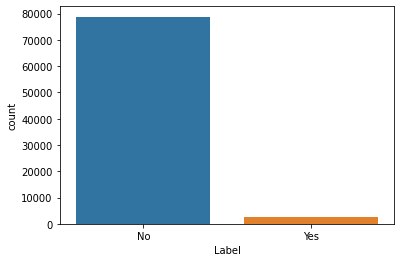

In [37]:
g = sns.countplot(df['Label'])
g.set_xticklabels(['No','Yes'])
plt.show()

Original dataset shape Counter({0: 55173, 1: 1945})
Resample dataset shape Counter({0: 55173, 1: 55173})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


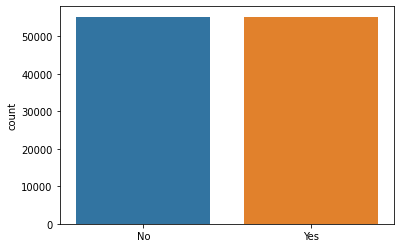

In [42]:
from imblearn.over_sampling import SMOTE
from collection.Collection import Counter
from sklearn.model_selection import train_test_split

smote = SMOTE()
x = df.drop('Label',axis=1)
y = df['Label']
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size = 0.3, random_state = 42, stratify=y)

x_smote, y_smote = smote.fit_resample(x_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

#df = x_smote.copy()
#df['class_label'] = y_smote.copy()


g = sns.countplot(y_smote)
g.set_xticklabels(['No','Yes'])
plt.show()


### Start with model training

In [ ]:

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score
from sklearn import metrics
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import time


##### Using this custom function for printing the model evaluation parameters and confusion matrix

In [ ]:
def cf_mat_plot(y_test,y_pred,model_name):
    cf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
    print(cf_matrix)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
    ax.set_title(f'{model_name}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['1','0'])
    ax.yaxis.set_ticklabels(['1','0'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()
    print('TP:', cf_matrix[0][0])
    print('TN:', cf_matrix[1][1])
    print('FP:', cf_matrix[1][0])
    print('FN:', cf_matrix[0][1])
    print('Accuracy score:',accuracy_score(y_test, y_pred))
    print('Precision score', metrics.precision_score(y_test, y_pred))
    print('Recall score', metrics.recall_score(y_test, y_pred))
    print('F1 score:',f1_score(y_test, y_pred))

Training Time: 0.013060808181762695s
Prediction Time: 69.0428478717804s
[[  716   117]
 [ 1225 22422]]


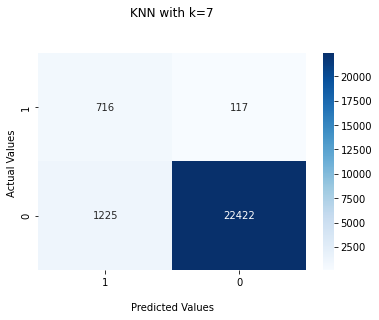

TP: 716
TN: 22422
FP: 1225
FN: 117
Accuracy score: 0.9451797385620915
Precision score 0.36888201957753736
Recall score 0.8595438175270108
F1 score: 0.5162220620043259


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=7)
start = time.time()
knn_model.fit(x_smote, y_smote)
stop = time.time()
start_pred = time.time()
y_pred = knn_model.predict(x_test)
stop_pred = time.time()
print(f'Training Time: {stop - start}s')
print(f'Prediction Time: {stop_pred - start_pred}s')
model_name='KNN with k=7'
cf_mat_plot(y_test, y_pred,model_name)

Training Time: 0.01966118812561035s
Prediction Time: 69.28044080734253s
[[  754    79]
 [ 1620 22027]]


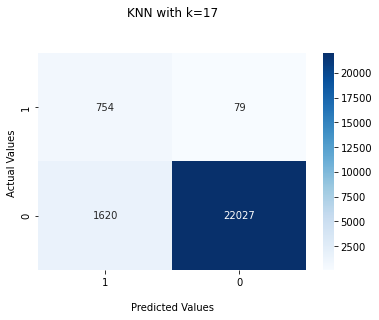

TP: 754
TN: 22027
FP: 1620
FN: 79
Accuracy score: 0.9305964052287582
Precision score 0.3176074136478517
Recall score 0.9051620648259304
F1 score: 0.4702213907078266


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=17)
start = time.time()
knn_model.fit(x_smote, y_smote)
stop = time.time()
start_pred = time.time()
y_pred = knn_model.predict(x_test)
stop_pred = time.time()
print(f'Training Time: {stop - start}s')
print(f'Prediction Time: {stop_pred - start_pred}s')
model_name = 'KNN with k=17'
cf_mat_plot(y_test, y_pred, model_name)

Training Time: 22.757718086242676s
Prediction Time: 0.36689090728759766s
[[  678   155]
 [  232 23415]]


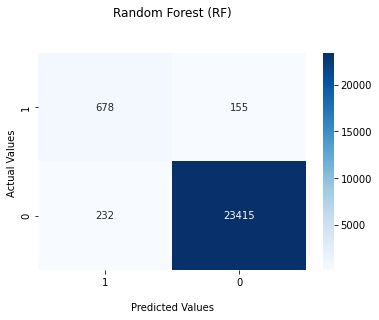

TP: 678
TN: 23415
FP: 232
FN: 155
Accuracy score: 0.9841911764705882
Precision score 0.7450549450549451
Recall score 0.8139255702280912
F1 score: 0.7779690189328743


In [ ]:
rfc = RandomForestClassifier()
# fit the predictor and target
start = time.time()
rfc.fit(x_smote, y_smote)
stop = time.time()
# predict
start_pred = time.time()
rfc_predict = rfc.predict(x_test)# check performance
stop_pred = time.time()
print(f'Training Time: {stop - start}s')
print(f'Prediction Time: {stop_pred - start_pred}s')
model_name = 'Random Forest (RF)'
cf_mat_plot(y_test,rfc_predict,model_name)

Training Time: 21.730936288833618s
Prediction Time: 0.06864738464355469s
[[  760    73]
 [  634 23013]]


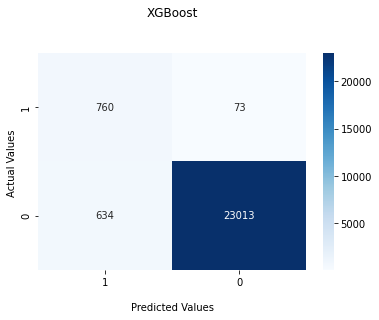

TP: 760
TN: 23013
FP: 634
FN: 73
Accuracy score: 0.9711192810457516
Precision score 0.5451936872309899
Recall score 0.9123649459783914
F1 score: 0.6825325550067355


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
start = time.time()
model.fit(x_smote, y_smote)
stop = time.time()
#print(model)
# make predictions for test data
start_pred = time.time()
y_pred = model.predict(x_test)
stop_pred = time.time()
#print(y_pred >= 0.5)
predictions = [round(value) for value in y_pred]
#print(predictions)
print(f'Training Time: {stop - start}s')
print(f'Prediction Time: {stop_pred - start_pred}s')
model_name='XGBoost'
cf_mat_plot(y_test, predictions, model_name)

Training Time: 3.3273072242736816s
Prediction Time: 0.007287502288818359s
[[  707   126]
 [  338 23309]]


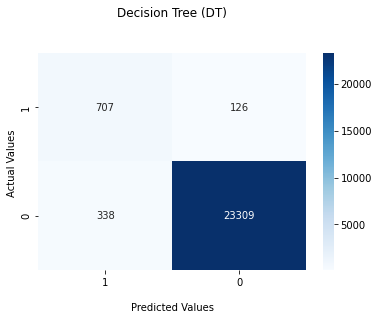

TP: 707
TN: 23309
FP: 338
FN: 126
Accuracy score: 0.9810457516339869
Precision score 0.676555023923445
Recall score 0.8487394957983193
F1 score: 0.7529286474973377


In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier(criterion='gini')
start = time.time()
DT = DT.fit(x_smote, y_smote)
stop = time.time()
start_pred = time.time()
y_pred = DT.predict(x_test)
stop_pred = time.time()
print(f'Training Time: {stop - start}s')
print(f'Prediction Time: {stop_pred - start_pred}s')
model_name = 'Decision Tree (DT)'
cf_mat_plot(y_test, y_pred, model_name)

Training Time: 0.125471830368042s
Prediction Time: 0.029827117919921875s
[[  799    34]
 [ 6076 17571]]


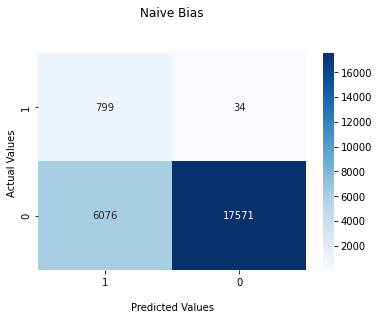

TP: 799
TN: 17571
FP: 6076
FN: 34
Accuracy score: 0.7504084967320261
Precision score 0.11621818181818182
Recall score 0.9591836734693877
F1 score: 0.20731707317073172


In [ ]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
start = time.time()
NB.fit(x_smote,y_smote)
stop = time.time()
start_pred = time.time()
y_pred = NB.predict(x_test)
stop_pred = time.time()
print(f'Training Time: {stop - start}s')
print(f'Prediction Time: {stop_pred - start_pred}s')
model_name = 'Naive Bias'
cf_mat_plot(y_test,y_pred,model_name)

Training Time: 11.293925285339355s
Prediction Time: 0.16334748268127441s
[[  713   120]
 [  254 23393]]


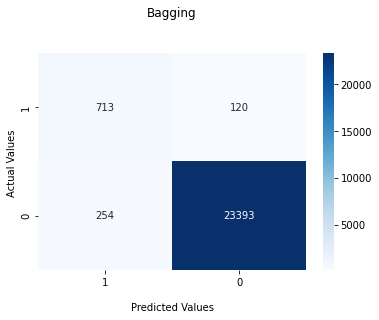

TP: 713
TN: 23393
FP: 254
FN: 120
Accuracy score: 0.9847222222222223
Precision score 0.7373319544984488
Recall score 0.8559423769507803
F1 score: 0.7922222222222224


In [ ]:
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier()
start = time.time()
model.fit(x_smote, y_smote)
stop = time.time()
start_pred = time.time()
y_pred = model.predict(x_test)
stop_pred = time.time()
print(f'Training Time: {stop - start}s')
print(f'Prediction Time: {stop_pred - start_pred}s')
model_name = 'Bagging'
cf_mat_plot(y_test, y_pred, model_name)